# Import package and setting Jupyter

In [1]:
from sklearn.feature_selection import chi2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Setting
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)

path = "C:\Data\OneDrive - apps.ipb.ac.id\Work\Lomba\\2021 BRI Data Hackathon"

# Import data

## Train

In [2]:
train = pd.read_csv("{}/people_analytics/train.csv".format(path))
train.info()
train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0


In [12]:
train["gender"] = train["gender"].astype("str")

In [13]:
features = train.drop(["Best Performance"], axis = 1).columns.to_list()
cat_features = train.select_dtypes("object").columns.to_list()
num_features = np.setdiff1d(features, cat_features)

In [14]:
train[num_features].describe()
train[cat_features].describe()

,Achievement_above_100%_during3quartal,GPA,Last_achievement_%,age,annual leave,assign_of_otherposition,branch_rotation,job_duration_from_training,job_duration_in_current_branch,job_duration_in_current_job_level,job_duration_in_current_person_level,job_rotation,number_of_dependences,sick_leaves,year_graduated
count,11152.000000,11153.000000,11152.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000
mean,0.679071,3.176195,72.234902,1985.837084,3.664216,1.202726,3.720165,6.277952,1.034646,1.433208,1.349218,3.505694,0.995517,1.100152,2009.174124
std,1.107381,13.321687,23.030421,4.632214,2.652648,2.575138,2.399068,5.033553,0.416723,0.431086,0.324660,1.818028,0.881103,2.714525,4.117162
min,0.000000,0.000000,4.510000,1963.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1982.000000
25%,0.000000,2.820000,56.650000,1985.000000,2.000000,0.000000,2.000000,4.000000,0.707107,1.224745,1.224745,2.000000,0.000000,0.000000,2008.000000
50%,0.000000,3.070000,71.675000,1987.000000,3.000000,0.000000,3.000000,5.000000,1.118034,1.352775,1.352775,3.000000,1.000000,0.000000,2010.000000
75%,1.000000,3.270000,88.172500,1989.000000,5.000000,1.000000,4.000000,6.000000,1.224745,1.414214,1.385641,4.000000,2.000000,1.000000,2012.000000
max,3.000000,378.000000,130.000000,1997.000000,21.000000,29.000000,22.000000,36.000000,2.677686,2.958040,2.828427,15.000000,7.000000,77.000000,2019.000000


,job_level,person_level,Employee_type,gender,marital_status_maried(Y/N),Education_level
count,11153,11153,11153,11153,11153,11153
unique,3,8,3,2,2,6
top,JG04,PG03,RM_type_A,2,Y,level_4
freq,10413,9655,7287,8204,9501,9222


## Test

In [15]:
test = pd.read_csv("{}/people_analytics/test.csv".format(path))
test.info()
test.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              6000 non-null   object 
 1   job_duration_in_current_job_level      6000 non-null   float64
 2   person_level                           6000 non-null   object 
 3   job_duration_in_current_person_level   6000 non-null   float64
 4   job_duration_in_current_branch         6000 non-null   float64
 5   Employee_type                          6000 non-null   object 
 6   gender                                 6000 non-null   int64  
 7   age                                    6000 non-null   int64  
 8   marital_status_maried(Y/N)             6000 non-null   object 
 9   number_of_dependences                  6000 non-null   int64  
 10  Education_level                        6000 non-null   object 
 11  GPA 

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,level_3,3.08,2009,6,4,2,6,3,7,84.02,0.0
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,level_4,3.31,2014,2,2,2,0,1,0,63.74,0.0
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,level_4,3.44,2011,4,2,2,0,2,1,88.19,1.0
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,level_4,0.00,2014,3,1,3,0,3,0,25.94,0.0
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,level_4,3.34,2007,5,3,2,0,3,0,82.32,0.0


In [16]:
test["gender"] = test["gender"].astype("str")

# Feature selection

In this stage, the features selection is carried out so the data used is not too wide. Another features selection will be done depends on respective algorithms that will be used later.

## Handling missing value

Before doing features selection, I handled the missing value as prequisite on the next algorithm that will be used. The following is to handled the numerical data, meanwhile the categorical data will be handled using one-hot encoding.

In [17]:
for feature in num_features:
    miss_count = train[feature].isnull().sum()
    miss_percentage = (miss_count / len(train)) * 100
    
    print(feature + ": " + str(miss_count) + ", " + str(miss_percentage) + "%")

Achievement_above_100%_during3quartal: 1, 0.008966197435667534%
GPA: 0, 0.0%
Last_achievement_%: 1, 0.008966197435667534%
age: 0, 0.0%
annual leave: 0, 0.0%
assign_of_otherposition: 0, 0.0%
branch_rotation: 0, 0.0%
job_duration_from_training: 0, 0.0%
job_duration_in_current_branch: 0, 0.0%
job_duration_in_current_job_level: 0, 0.0%
job_duration_in_current_person_level: 0, 0.0%
job_rotation: 0, 0.0%
number_of_dependences: 0, 0.0%
sick_leaves: 0, 0.0%
year_graduated: 0, 0.0%


We will replace the missing value by using its median.

In [18]:
train_fillna = train.copy()

for feature in num_features:
    median = train_fillna[feature].median()
    train_fillna[feature] = train_fillna[feature].fillna(median)

In [19]:
for feature in num_features:
    miss_count = train_fillna[feature].isnull().sum()
    miss_percentage = (miss_count / len(train_fillna)) * 100
    print(feature + ": " + str(miss_count) + ", " + str(miss_percentage) + "%")

Achievement_above_100%_during3quartal: 0, 0.0%
GPA: 0, 0.0%
Last_achievement_%: 0, 0.0%
age: 0, 0.0%
annual leave: 0, 0.0%
assign_of_otherposition: 0, 0.0%
branch_rotation: 0, 0.0%
job_duration_from_training: 0, 0.0%
job_duration_in_current_branch: 0, 0.0%
job_duration_in_current_job_level: 0, 0.0%
job_duration_in_current_person_level: 0, 0.0%
job_rotation: 0, 0.0%
number_of_dependences: 0, 0.0%
sick_leaves: 0, 0.0%
year_graduated: 0, 0.0%


## Outliers removal

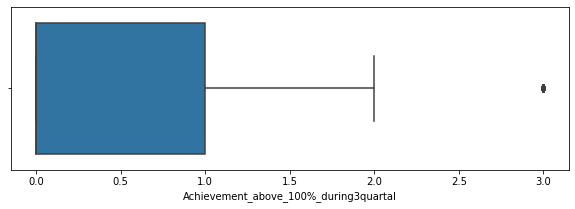

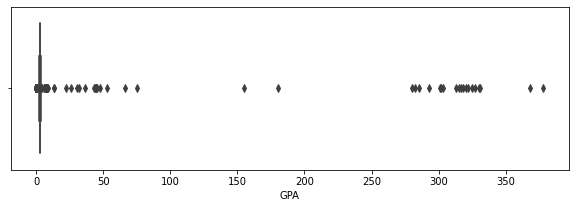

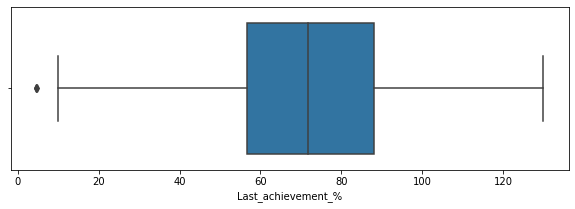

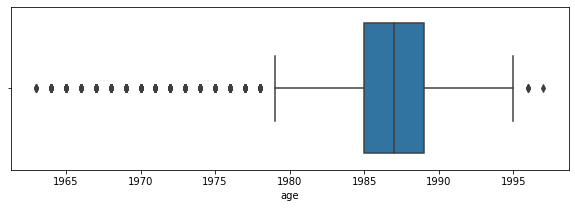

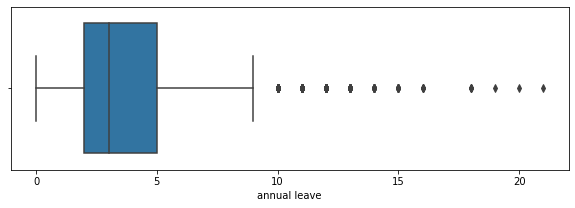

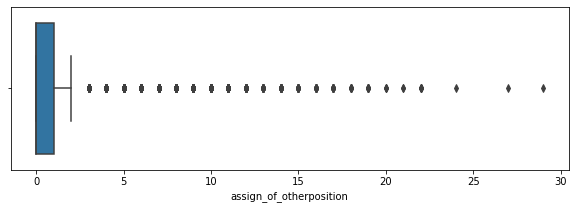

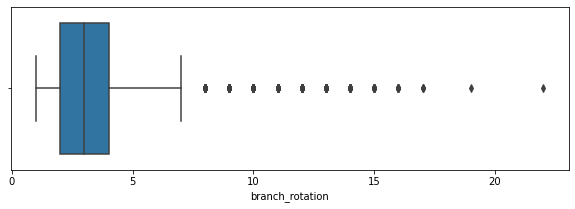

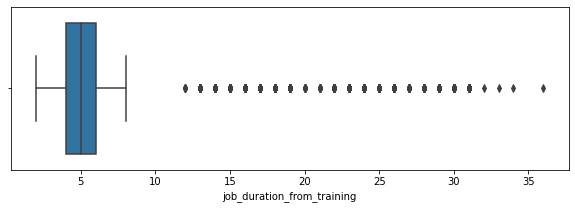

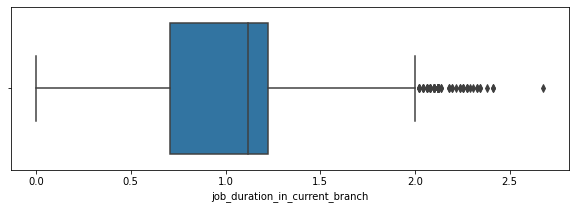

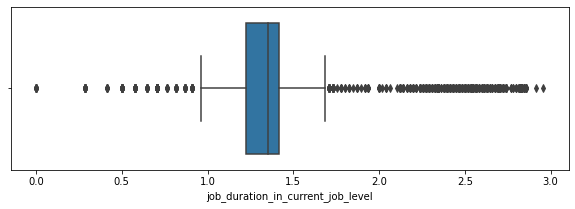

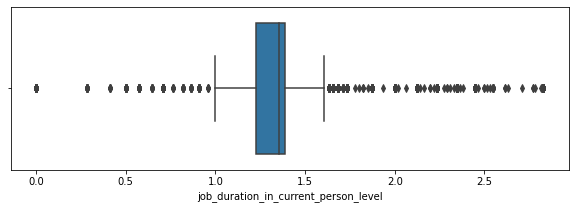

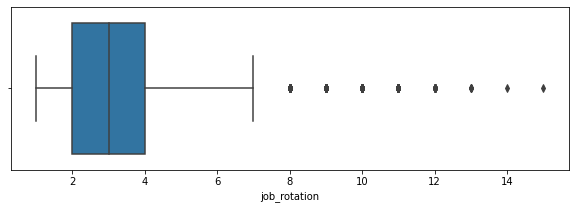

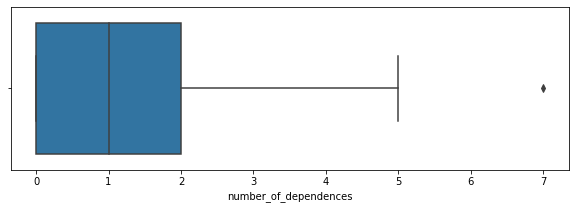

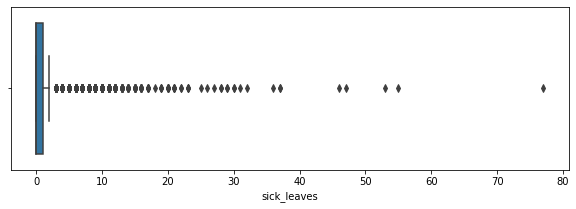

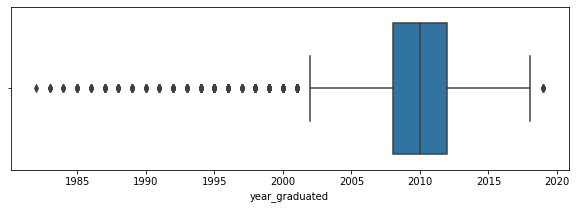

In [20]:
for feature in num_features:
    _ = plt.figure(figsize = (10, 3))
    _ = sns.boxplot(x = train[feature])
    
    plt.show()

We could use simple boxplot to remove the outliers. Usually, a datum considered as normal if it lies between the lower inner fence (Q1 - 1.5 IQR) and upper inner fence (Q3 + 1.5 IQR). But because there is too many outliers, we will just remove the data outside lower outer fence (Q1 - 3 IQR) and upper outer fence (Q3 + 1.5 IQR) and set the data between inner and outer fence to inner fence

In [21]:
train_outremoved = train_fillna.copy()

for feature in num_features:
    Q1, Q3 = train_outremoved[feature].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    low_in = Q1 - (1.5 * IQR)
    low_out = Q1 - (3 * IQR)
    up_in = Q3 + (1.5 * IQR)
    up_out = Q3 + (3 * IQR)
    
    train_outremoved = train_outremoved[(train_outremoved[feature] < up_out)]
    train_outremoved = train_outremoved[(train_outremoved[feature] > low_out)]
    
    train_outremoved[feature] = np.clip(train_outremoved[feature], a_min = low_in, a_max = up_in)

In [22]:
train_outremoved.describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,1.323103,1.323021,1.032492,1987.277847,0.839487,3.164051,2010.290519,4.579944,2.945401,2.956352,0.375078,3.596370,0.461358,71.764523,0.590191,0.145338
std,0.130425,0.130462,0.412144,2.459897,0.773911,0.237296,2.312132,1.412146,1.113630,0.974468,0.723783,2.411463,0.789439,22.965368,0.952581,0.352469
min,0.983401,0.983401,0.000000,1979.000000,0.000000,2.145000,2004.500000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,9.930000,0.000000,0.000000
25%,1.224745,1.224745,0.707107,1986.000000,0.000000,3.000000,2009.000000,3.000000,2.000000,2.000000,0.000000,2.000000,0.000000,56.425000,0.000000,0.000000
50%,1.322876,1.322876,1.118034,1987.000000,1.000000,3.140000,2011.000000,5.000000,3.000000,3.000000,0.000000,3.000000,0.000000,71.055000,0.000000,0.000000
75%,1.385641,1.385641,1.224745,1989.000000,1.000000,3.310000,2012.000000,6.000000,4.000000,3.000000,0.000000,5.000000,1.000000,87.540000,1.000000,0.000000
max,1.626984,1.626984,2.001202,1995.000000,2.500000,3.945000,2016.500000,10.500000,7.000000,7.000000,2.500000,9.500000,2.500000,130.000000,2.500000,1.000000


## One Hot Encoding

In [23]:
X_train_outremoved = train_outremoved[features]
y_train_outremoved = train_outremoved["Best Performance"]

In [24]:
X_train_enc = pd.get_dummies(X_train_outremoved[cat_features])
X_train_enc = pd.concat([X_train_outremoved[num_features], X_train_enc], axis = 1)

## ChiSquare

In [25]:
chisq = chi2(X_train_enc, y_train_outremoved)

Text(0.5, 1.0, 'ChiSquare score rank')

[Text(0.5, 0, 'ChiSquare Score'), Text(0, 0.5, 'Feature')]

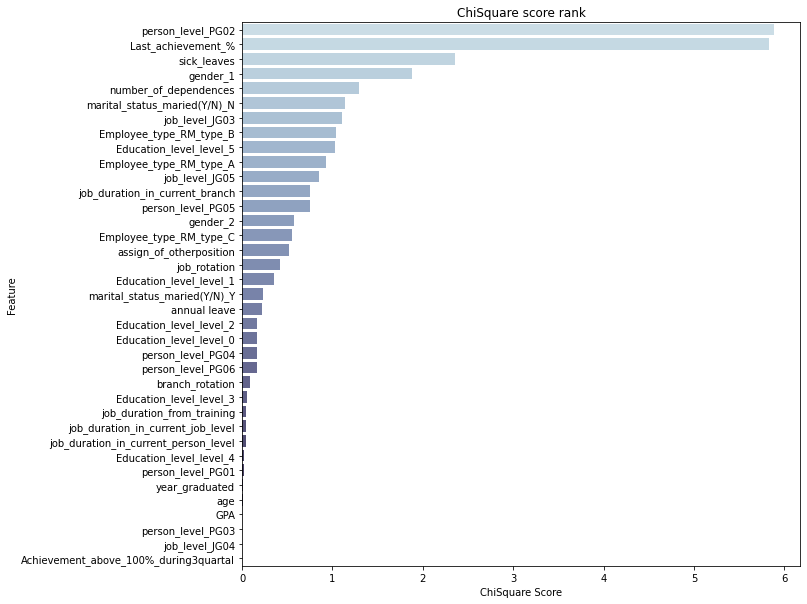

In [26]:
score = chisq[0]
columns = X_train_enc.columns

chisq_score = pd.DataFrame({"columns": columns, "score": score}).sort_values("score", ascending = False)

_ = plt.figure(figsize = (10, 10))
_ = sns.barplot(x = chisq_score["score"], y = chisq_score["columns"], palette = "ch:s=.25,rot=-.25")
_.set_title("ChiSquare score rank")
_.set(xlabel = "ChiSquare Score", ylabel = "Feature")

plt.show()

## Correlation

One of of the highly correlated feature pairs will be removed.

In [27]:
correlation = X_train_enc.corr()

Text(0.5, 1.0, 'Features correlation heatmap')

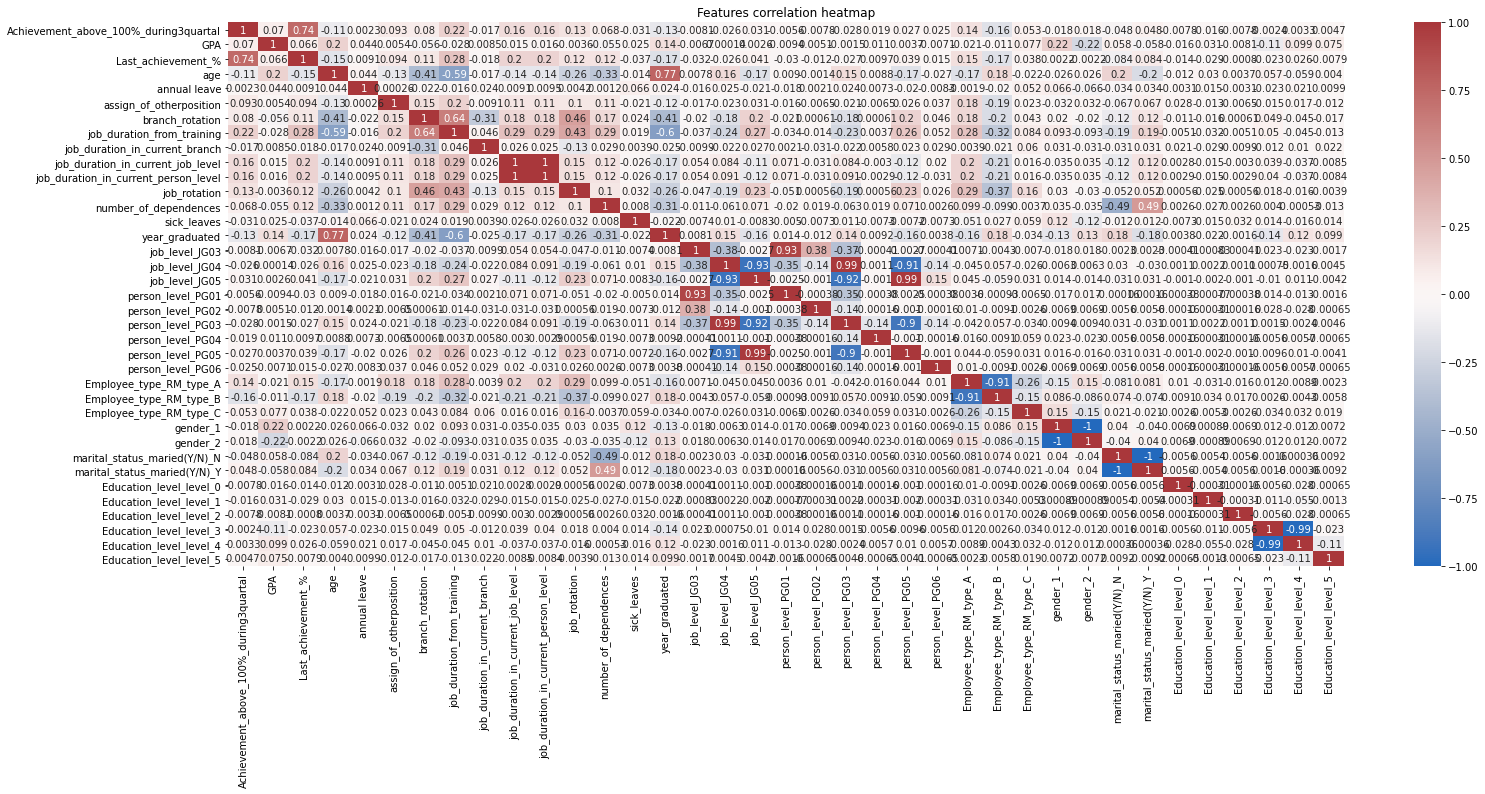

In [28]:
_ = plt.figure(figsize = (25, 10))
_ = sns.heatmap(correlation, annot = True, cmap = "vlag", vmin = -1, vmax = 1)
_.set_title("Features correlation heatmap")

plt.show()

Highly correlated features (> 0.7):

* Achievement_above_100%__during3quartal - Last_achievement_%
* age - year_graduated
* job_duration_in_current_job_level - job_duration_in_current_person_level
* job_level_JG03 - person_level_PG01
* job_level_JG04 - job_level_JG05
* job_level_JG04 - person_level_PG03
* job_level_JG04 - person_level_PG05
* job_level_JG05 - person_level_PG03
* job_level_JG05 - person_level_PG05
* person_level_PG03 - person_level_PG05
* Employee_type_RM_type_A - Employee_type_RM_type_B
* gender_1 - gender_2
* marital_status_maried(Y/N)_N - marital_status_maried(Y/N)_Y
* Education_level_level_3 - Education_level_level_4

Features that will be removed according to its ChiSquare score:

* Achievement_above_100%__during3quartal
* age
* job_duration_in_current_person_level
* person_level_PG01
* job_level_JG04
* person_level_PG03
* person_level_PG05
* Employee_type_RM_type_A
* gender_2
* marital_status_maried(Y/N)_Y
* Education_level_level_4

In [29]:
features = X_train_enc.columns
removed_features = ["Achievement_above_100%__during3quartal", "age", "job_duration_in_current_person_level", "person_level_PG01",
                    "job_level_JG04", "person_level_PG03", "person_level_PG05", "Employee_type_RM_type_A", "gender_2",
                    "marital_status_maried(Y/N)_Y", "Education_level_level_4"]

features = [feature for feature in features if feature not in removed_features]

In [30]:
X_train_fin = X_train_enc[features]

# Preprocess test data

## One Hot Encoding

In [31]:
X_test_enc = pd.get_dummies(test[cat_features])
X_test_enc = pd.concat([test[num_features], X_test_enc], axis = 1)

In [32]:
X_test_fin = X_test_enc[features]

# Write data

In [33]:
X_train_fin.head(5)
X_test_fin.head(5)

,Achievement_above_100%_during3quartal,GPA,Last_achievement_%,annual leave,assign_of_otherposition,branch_rotation,job_duration_from_training,job_duration_in_current_branch,job_duration_in_current_job_level,job_rotation,number_of_dependences,sick_leaves,year_graduated,job_level_JG03,job_level_JG05,person_level_PG02,person_level_PG04,person_level_PG06,Employee_type_RM_type_B,Employee_type_RM_type_C,gender_1,marital_status_maried(Y/N)_N,Education_level_level_0,Education_level_level_1,Education_level_level_2,Education_level_level_3,Education_level_level_5
0,0.0,2.860,46.37,3.0,2.0,2.0,4.0,1.732051,1.352775,3.0,1.0,0.0,2011.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0.0,3.010,26.76,9.0,0.0,2.0,3.0,0.412311,1.118034,2.0,0.0,0.0,2007.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
9,0.0,3.945,41.45,3.0,0.0,2.0,3.0,0.412311,1.118034,2.0,0.0,0.0,2009.0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
11,0.0,2.960,49.15,8.0,0.0,2.0,3.0,0.707107,1.322876,2.0,0.0,0.0,2007.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
105,0.0,3.900,64.94,0.0,0.0,3.0,2.0,0.707107,1.414214,2.0,0.0,0.0,2010.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


,Achievement_above_100%_during3quartal,GPA,Last_achievement_%,annual leave,assign_of_otherposition,branch_rotation,job_duration_from_training,job_duration_in_current_branch,job_duration_in_current_job_level,job_rotation,number_of_dependences,sick_leaves,year_graduated,job_level_JG03,job_level_JG05,person_level_PG02,person_level_PG04,person_level_PG06,Employee_type_RM_type_B,Employee_type_RM_type_C,gender_1,marital_status_maried(Y/N)_N,Education_level_level_0,Education_level_level_1,Education_level_level_2,Education_level_level_3,Education_level_level_5
0,0.0,3.08,84.02,3,6,4,6,0.707107,1.256981,2,0,7,2009,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,0.0,3.31,63.74,1,0,2,2,1.256981,1.224745,2,0,0,2014,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1.0,3.44,88.19,2,0,2,4,1.081665,0.500000,2,1,1,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.00,25.94,3,0,1,3,1.802776,1.256981,3,1,0,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,3.34,82.32,3,0,3,5,1.224745,1.352775,2,0,0,2007,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [34]:
X_train_fin.to_pickle("X_train_fin.pkl")
y_train_outremoved.to_pickle("y_train.pkl")

X_test_fin.to_pickle("X_test_fin.pkl")

job_level
JG03       36
JG04    10413
JG05      704
Name: job_level, dtype: int64

person_level
PG01      19
PG02      16
PG03    9655
PG04     757
PG05     308
PG06     378
PG07      19
PG08       1
Name: person_level, dtype: int64

Employee_type
RM_type_A    7287
RM_type_B    3380
RM_type_C     486
Name: Employee_type, dtype: int64

marital_status_maried(Y/N)
N    1652
Y    9501
Name: marital_status_maried(Y/N), dtype: int64

Education_level
level_0       1
level_1     140
level_2       4
level_3    1743
level_4    9222
level_5      43
Name: Education_level, dtype: int64

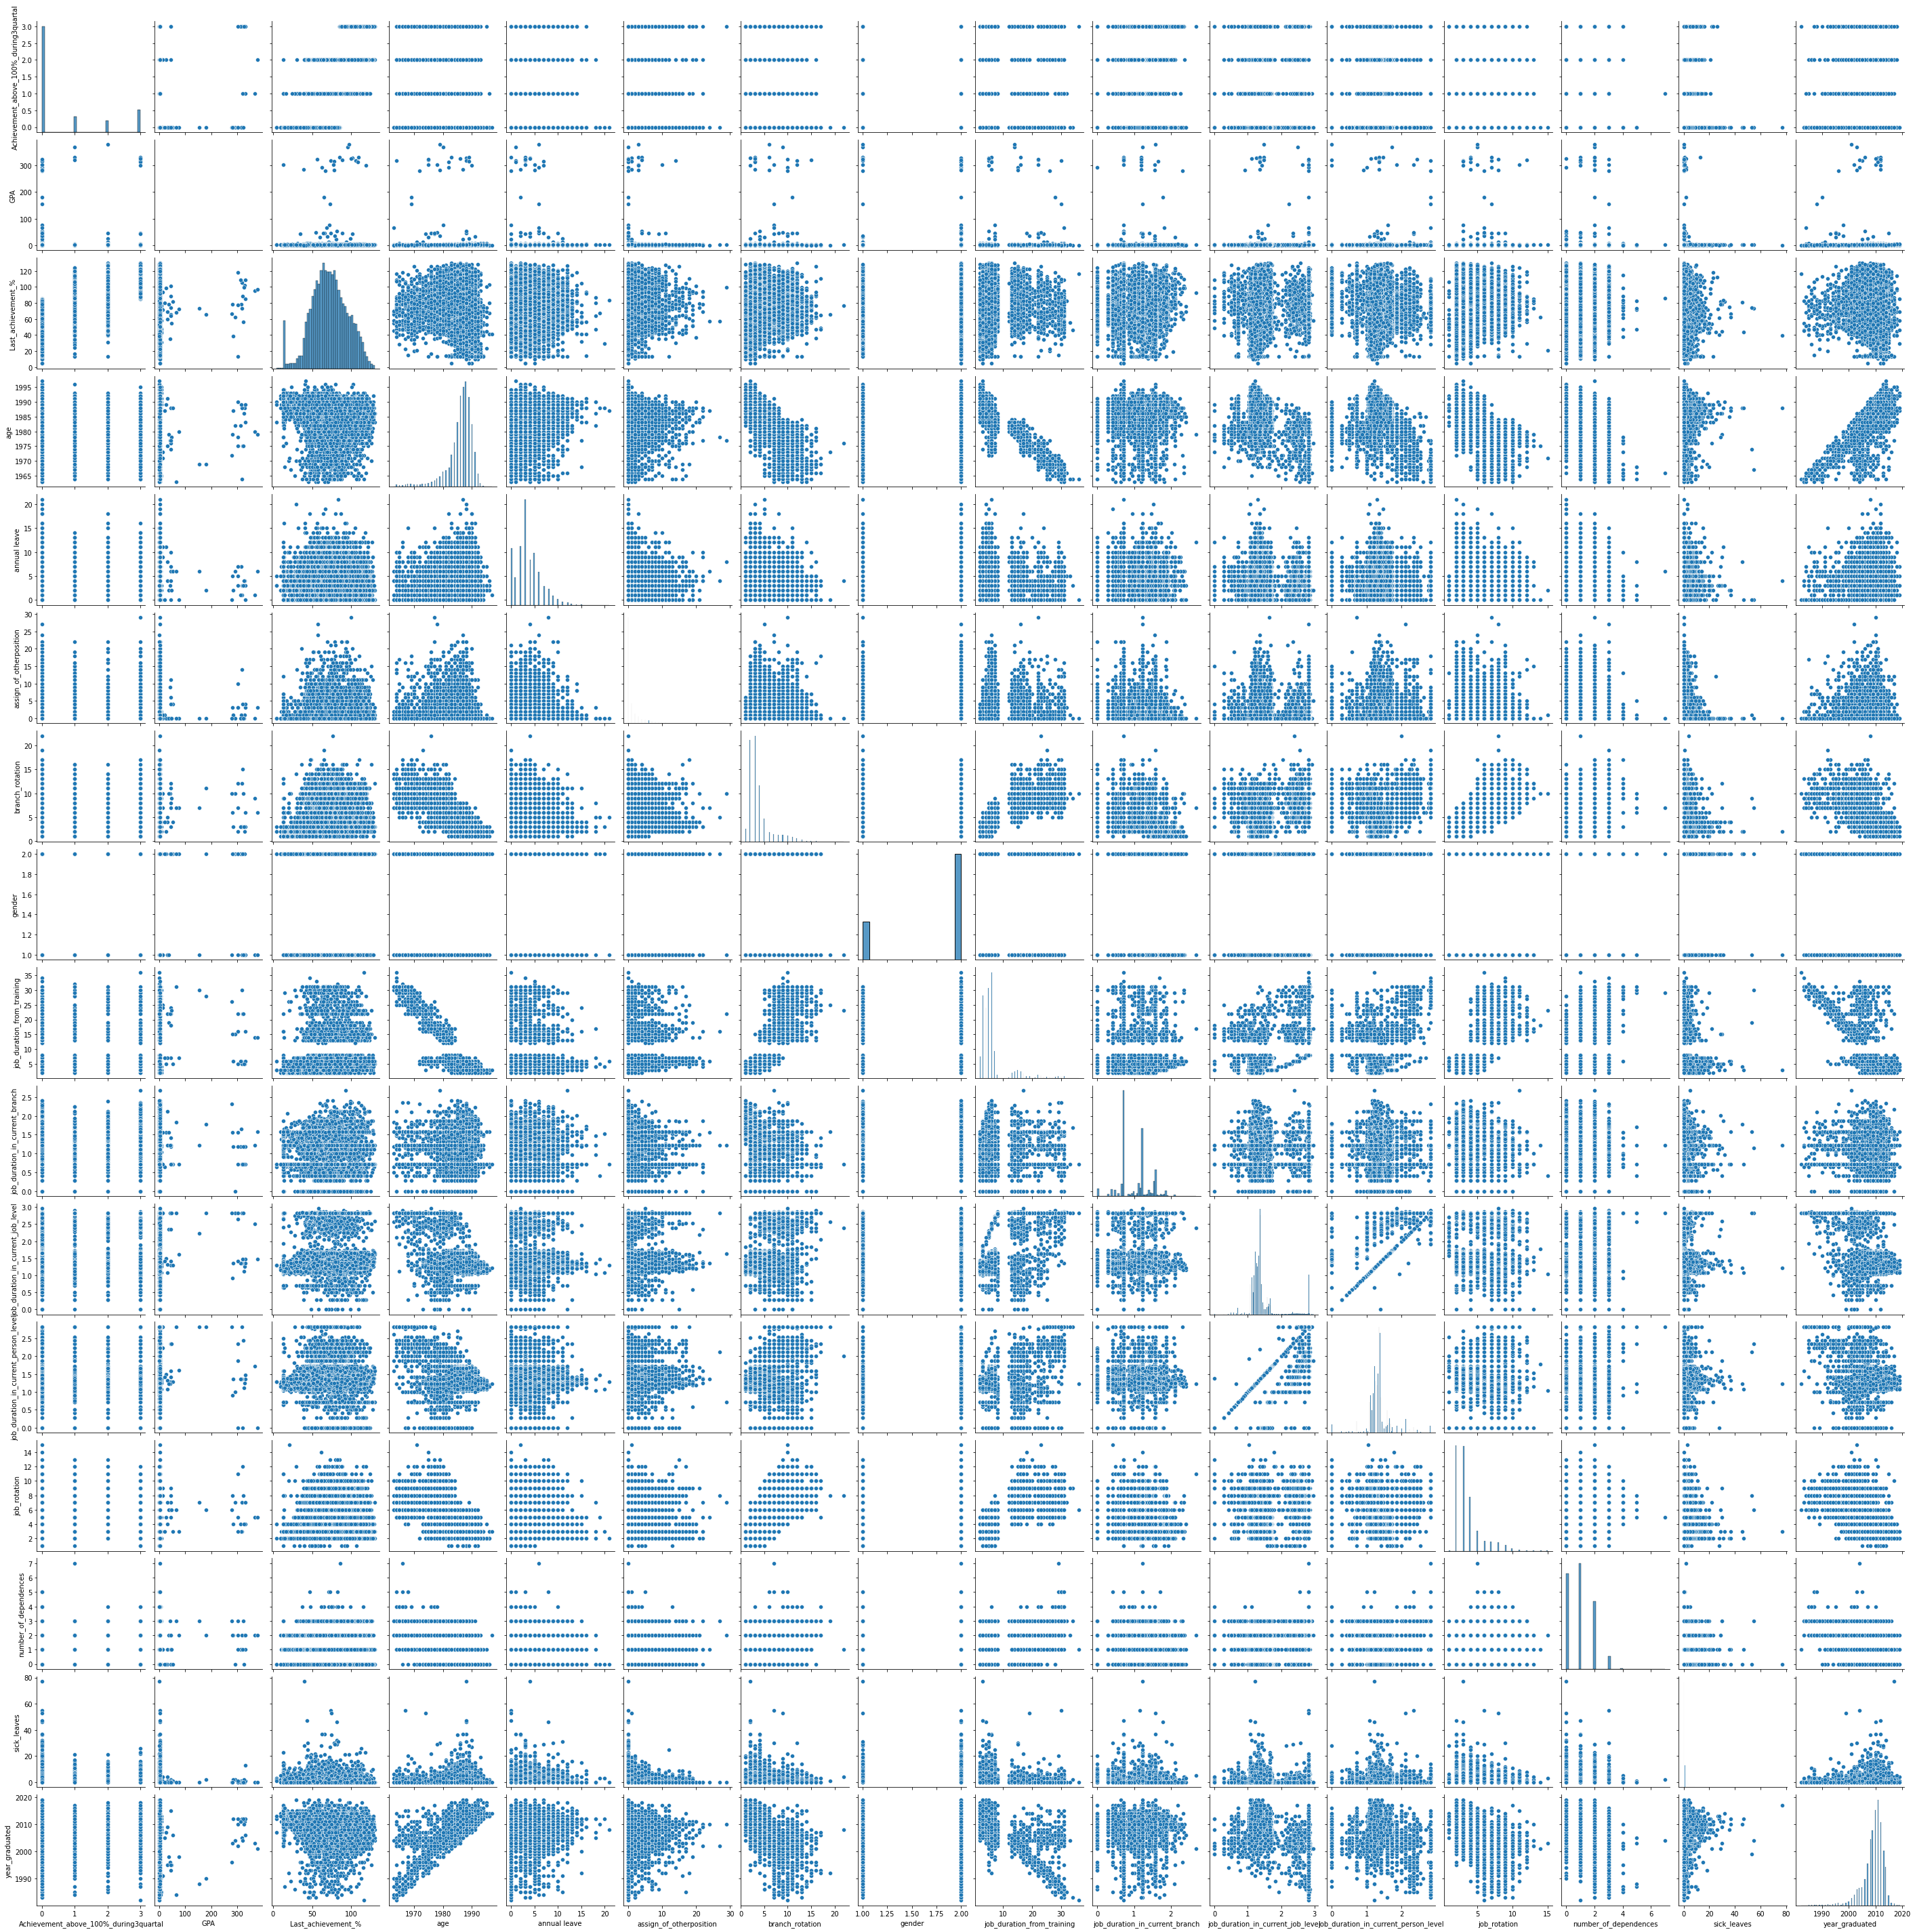

In [25]:
sns.pairplot(train[num_features])

for feature in cat_features:
    train.groupby(feature)[feature].count()